# Heart Disease Prediction 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# the dataset was downloaded from kaggle
df=pd.read_csv('heart.zip')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis

In [8]:
# null values
null_val=[n for n in df.columns if df[n].isnull().sum()>1]
null_val

[]

In [9]:
# numeric values
numeric=[m for m in df.columns if df[m].dtype!='O']
print(numeric)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [10]:
# number of 1 and 0 in target feature ( almost balanced data set)
l1=list(df.target)
print(l1.count(0))
print(l1.count(1))

138
165


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


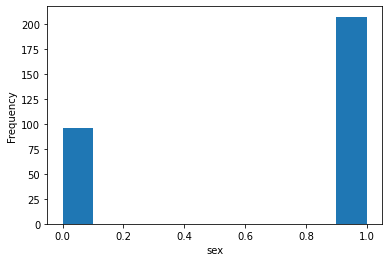

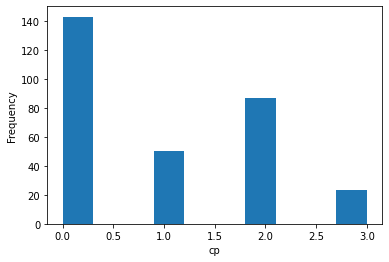

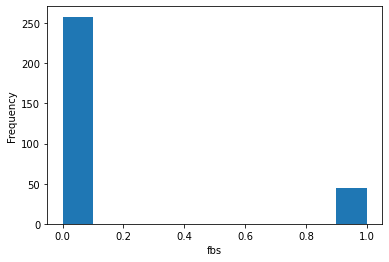

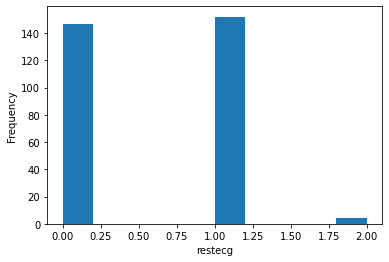

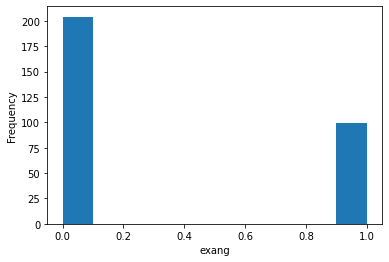

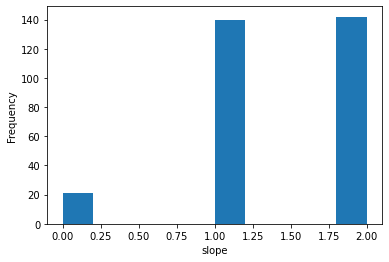

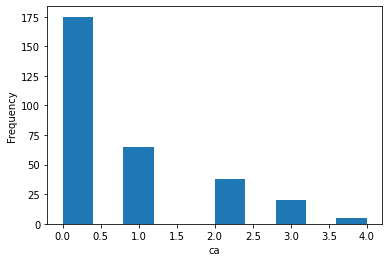

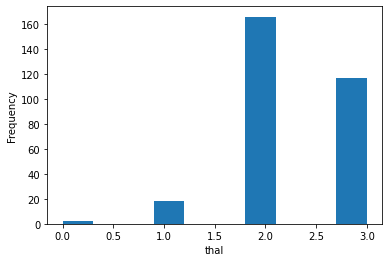

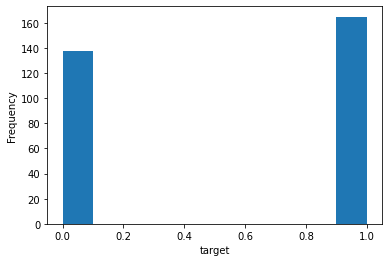

In [11]:
# distribution of features that are having discrete values.
discrete=[d for d in df.columns if len(df[d].unique())<25]
print(discrete)
for i in discrete:
    df[i].plot.hist()
    plt.xlabel(i)
    #df.groupby(i)['target'].median().plot.bar()
    plt.show()

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


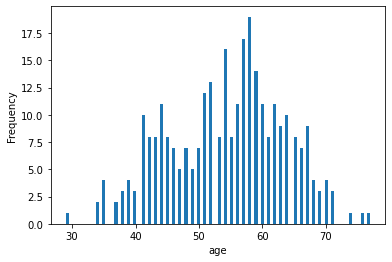

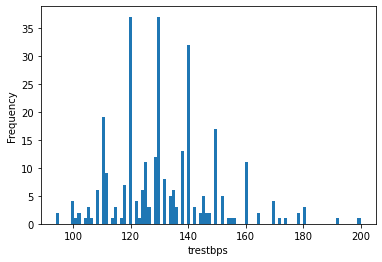

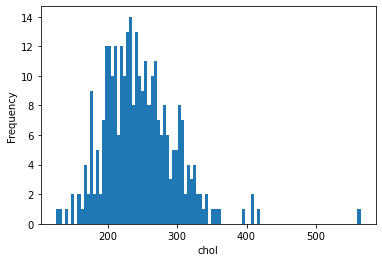

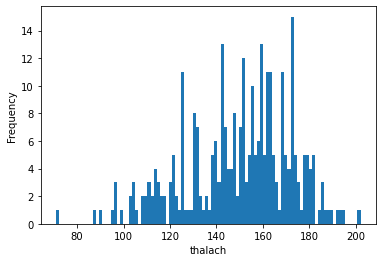

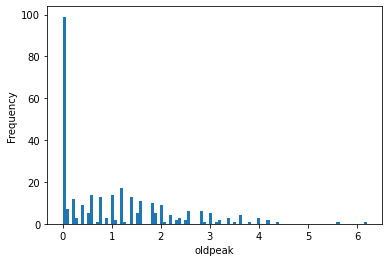

In [12]:
### contineous valriable and their distribution 
contineous=[c for c in df.columns if c not in discrete]
print(contineous)
for j in contineous:
    df[j].plot.hist(bins=100)
    plt.xlabel(j)
    plt.show()

In [14]:
l=list(df.age)
l.count(58)

19

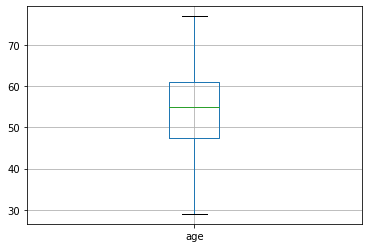

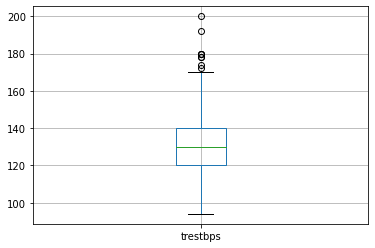

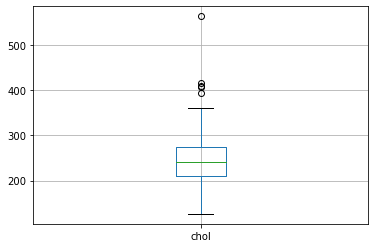

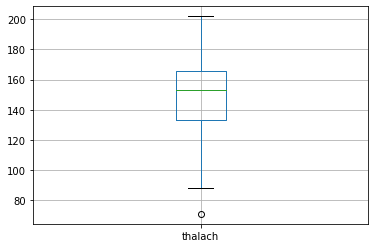

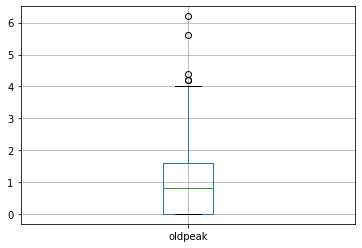

In [15]:
# outliers in contineous features using boxplot
for i in contineous:
    df.boxplot(column=i)
    plt.show()

In [16]:
# categorical features and their cardinality
categorical=[c for c in df.columns if df[c].dtype=='O']
categorical   

[]

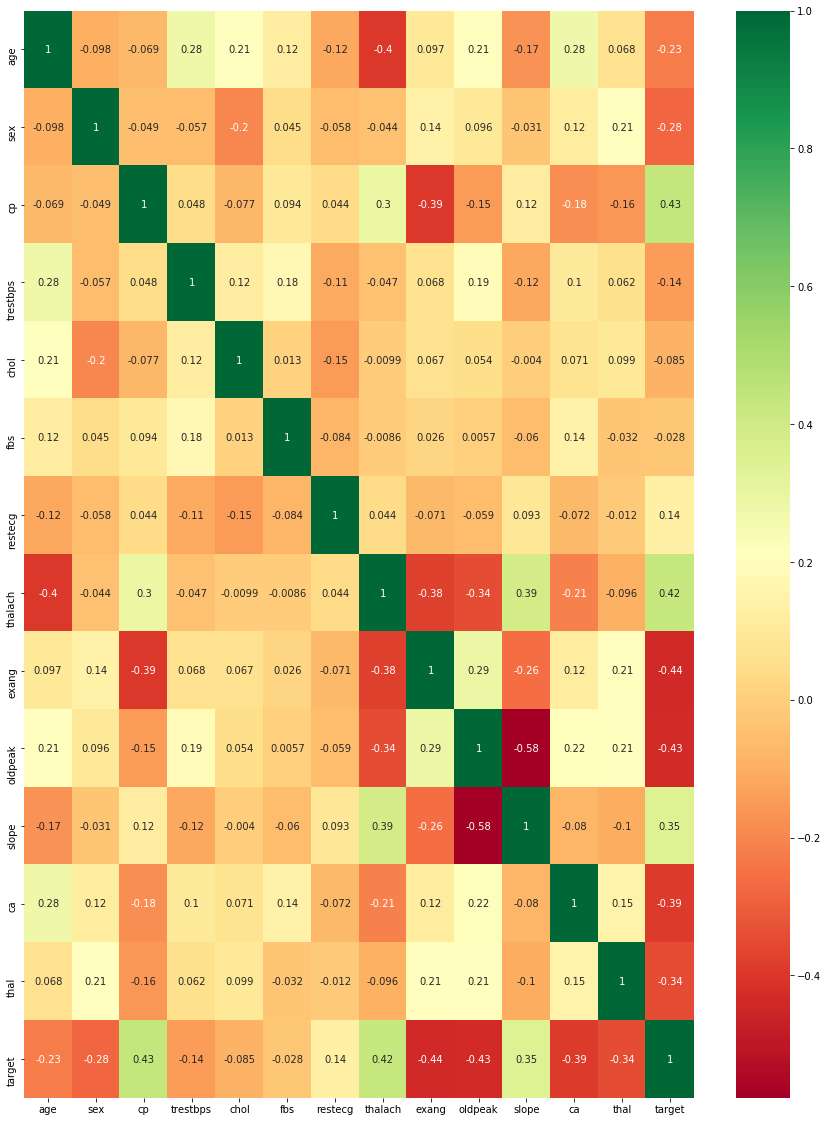

In [33]:
# heatmap for checking correlations
import seaborn as sns
coorelations=df.corr()
columnss=coorelations.index
plt.figure(figsize=(15,20))
g=sns.heatmap(df[columnss].corr(),annot=True,cmap='RdYlGn')

In [11]:
df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [12]:
df.shape

(303, 14)

In [13]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
df.columns[0]

'age'

In [17]:
x=df.iloc[:,0:13]
y=df.iloc[:,13]

In [18]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### one hot encoding

In [19]:
dataset=pd.get_dummies(x,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [20]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [21]:
# with the help of standard scaler we will scale down the values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
columns_scale=['age','trestbps','chol','thalach','oldpeak']
dataset[columns_scale]=sc.fit_transform(dataset[columns_scale])

In [22]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


## creating models

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset,y,test_size=0.4,random_state=0)

In [66]:
y_train.head()

159    1
282    0
110    1
21     1
29     1
Name: target, dtype: int64

In [67]:
x_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
159,0.180175,-0.092738,-0.488239,0.583939,-0.896862,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
282,0.511041,-0.321189,-0.546216,-0.684245,1.001069,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
110,1.062485,2.762907,1.521611,0.190365,-0.896862,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
21,-1.143291,-0.092738,-0.256334,1.283627,-0.551783,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
29,-0.150692,-0.092738,-0.952051,0.102904,0.138373,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [25]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
dt=d.predict(x_test)

In [27]:
dt

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [30]:
confusion_mat1=confusion_matrix(y_test,dt)
confusion_mat1

array([[41, 18],
       [16, 47]], dtype=int64)

In [32]:
acc_dt=accuracy_score(y_test,dt)

In [33]:
acc_dt

0.7213114754098361

### cross validation score

In [36]:
from sklearn.model_selection import cross_val_score
decision=cross_val_score(d,dataset,y,cv=10)
decision

array([0.83870968, 0.77419355, 0.80645161, 0.8       , 0.63333333,
       0.7       , 0.56666667, 0.83333333, 0.7       , 0.8       ])

In [37]:
decision.mean()

0.7452688172043012

### Random Forest Classifier

In [44]:
r=RandomForestClassifier()
r.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
rf=r.predict(x_test)

In [46]:
rf

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [56]:
confusion_mat2=confusion_matrix(y_test,rf)
confusion_mat2

array([[47, 12],
       [11, 52]], dtype=int64)

In [47]:
acc_rf=accuracy_score(y_test,rf)

In [48]:
acc_rf

0.8114754098360656

In [49]:
random=cross_val_score(r,dataset,y,cv=10)
random

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.83333333,
       0.76666667, 0.7       , 0.86666667, 0.76666667, 0.8       ])

In [50]:
random.mean()

0.8181720430107526

### KNN

In [53]:
# we dont know which value of k will give the best score ,so we are using for loop.
cv_scores=[]
for i in range(1,21):
    k=KNeighborsClassifier(n_neighbors=i)
    knn=cross_val_score(k,dataset,y,cv=10)
    print('score for k =',i,':',knn.mean())
    cv_scores.append(knn.mean()) 

score for k = 1 : 0.7455913978494624
score for k = 2 : 0.7591397849462365
score for k = 3 : 0.8120430107526883
score for k = 4 : 0.8053763440860215
score for k = 5 : 0.8348387096774192
score for k = 6 : 0.831505376344086
score for k = 7 : 0.8416129032258064
score for k = 8 : 0.8417204301075267
score for k = 9 : 0.8449462365591398
score for k = 10 : 0.8448387096774193
score for k = 11 : 0.8381720430107527
score for k = 12 : 0.8448387096774195
score for k = 13 : 0.841505376344086
score for k = 14 : 0.8415053763440861
score for k = 15 : 0.8280645161290323
score for k = 16 : 0.8381720430107527
score for k = 17 : 0.8280645161290323
score for k = 18 : 0.8249462365591398
score for k = 19 : 0.821505376344086
score for k = 20 : 0.8250537634408601


In [55]:
print(cv_scores) # from here we can check which k value gives the best cross val score and the use that.

[0.7455913978494624, 0.7591397849462365, 0.8120430107526883, 0.8053763440860215, 0.8348387096774192, 0.831505376344086, 0.8416129032258064, 0.8417204301075267, 0.8449462365591398, 0.8448387096774193, 0.8381720430107527, 0.8448387096774195, 0.841505376344086, 0.8415053763440861, 0.8280645161290323, 0.8381720430107527, 0.8280645161290323, 0.8249462365591398, 0.821505376344086, 0.8250537634408601]


### Knn using train test split

In [58]:
k.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [59]:
kn=k.predict(x_test)

In [60]:
kn

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [61]:
acc_kn=accuracy_score(y_test,kn)

In [62]:
acc_kn

0.8032786885245902

In [63]:
confusion_mat3=confusion_matrix(y_test,kn)
confusion_mat3

array([[41, 18],
       [ 6, 57]], dtype=int64)

In [ ]:
# so as per the results for knn we can see that there are few values of k (from 1 to 20 ) which can give the accuracy of approx 84 percent  

In [ ]:
# also we will see in auto machine learning (pycaret) that the best algorithm for this data set is different which can give more accurate results.